In [ ]:
import torch 
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
import networkx as nx
from torch_geometric.utils import degree
from collections import Counter
import torch_geometric.transforms as T


In [1]:
import numpy as np
import torch_geometric
print(np.__version__)

1.26.4


In [97]:
tx = T.Compose([T.NormalizeFeatures(), T.ToUndirected()])
dataset = Planetoid(root='~/Desktop/Y4S1/SC4020/Project/data', name='CiteSeer', transform = tx)
data = dataset[0] #the data object is present at the 0 index of the dataset

## The CiteSeer Dataset

The CiteSeer dataset consists of 3312 (the number of nodes) scientific publications classified into one of six classes. The citation network consists of 4732 links. 

The feature representation for each node/publication is a one hot encoding word vector of the the dimension 3703. 

The papers are classified into one of 6 classes below:
1) Agents
2) AI
3) DB
4) IR
5) ML
6) HCI


In [92]:
#the dataset contents meta data
pd.read_csv('/Users/sahanarahim/Desktop/Y4S1/SC4020/Project 1/citeseer-doc-classification/citeseer.content', sep = '\t', low_memory = False)

#
pd.read_csv('/Users/sahanarahim/Desktop/Y4S1/SC4020/Project 1/citeseer-doc-classification/citeseer.cites', sep = '\t', low_memory = False)


,100157,100157.1
0,100157,364207
1,100157,38848
2,100157,bradshaw97introduction
3,100157,bylund99coordinating
4,100157,dix01metaagent
...,...,...
4726,zhao98empirical,zhao99discriminant
4727,zheng98stochastic,90601
4728,zheng98stochastic,zheng98integrating
4729,zhu00incorporating,clarke01exploiting


In [ ]:
#Properties of the dataset

#node features
data['x'] #gives a matrix of shape [num nodes, num features]
print(f'The edge connected: {data.edge_index}') #index of the edges - [2, num of features] - which edge connects to which 
print(f'number of nodes: {data.num_nodes}')
print(f'number of edges: {data.num_edges}')
print(f'the features for each node: {data.y}') #node features to train towards
print(f'number of features for each node: {data.num_node_features}')
print(f'Is the graph undirected? {data.is_undirected()}')#it is an undirected graph 
print(f'does it have isolated nodes? {data.has_isolated_nodes()}') #odes the data have isolated nodes



True

/var/folders/v5/y4zm3htx6538gx29nlghvp9r0000gn/T/ipykernel_14385/4244803300.py:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(g.nodes, n_sample)


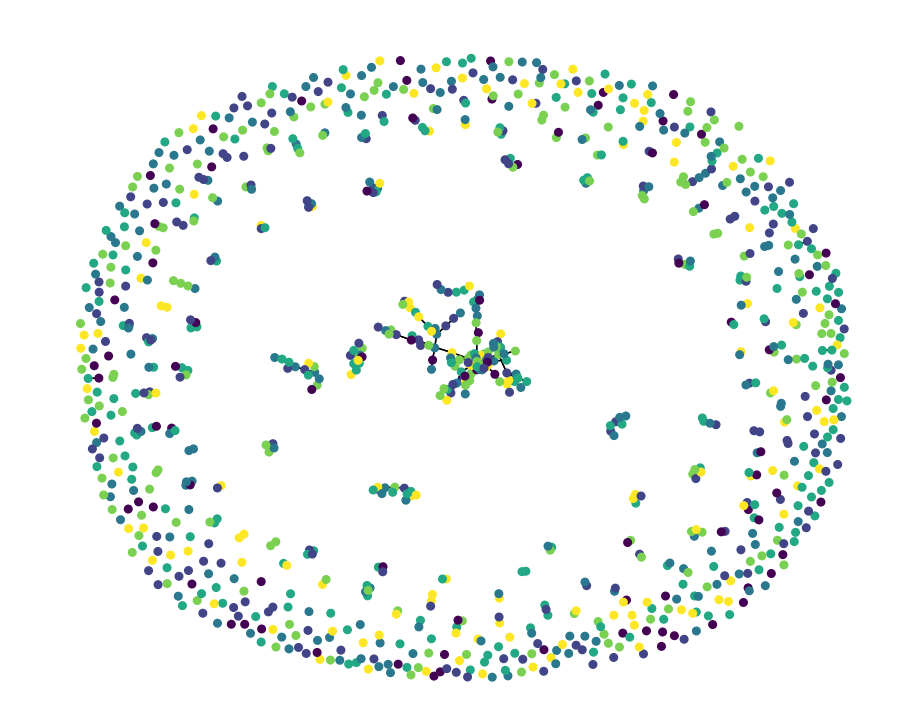

In [91]:
import random
from torch_geometric.utils import to_networkx
import networkx as nx

def convert_to_networkx(graph, n_sample=None):

    g = to_networkx(graph, node_attrs=["x"])
    y = graph.y.numpy()

    if n_sample is not None:
        sampled_nodes = random.sample(g.nodes, n_sample)
        g = g.subgraph(sampled_nodes)
        y = y[sampled_nodes]

    return g, y


def plot_graph(g, y):

    plt.figure(figsize=(9, 7))
    nx.draw_spring(g, node_size=30, arrows=False, node_color=y)
    plt.show() 
    
    
g, y = convert_to_networkx(data, n_sample=1000)
plot_graph(g, y)

<BarContainer object of 32 artists>

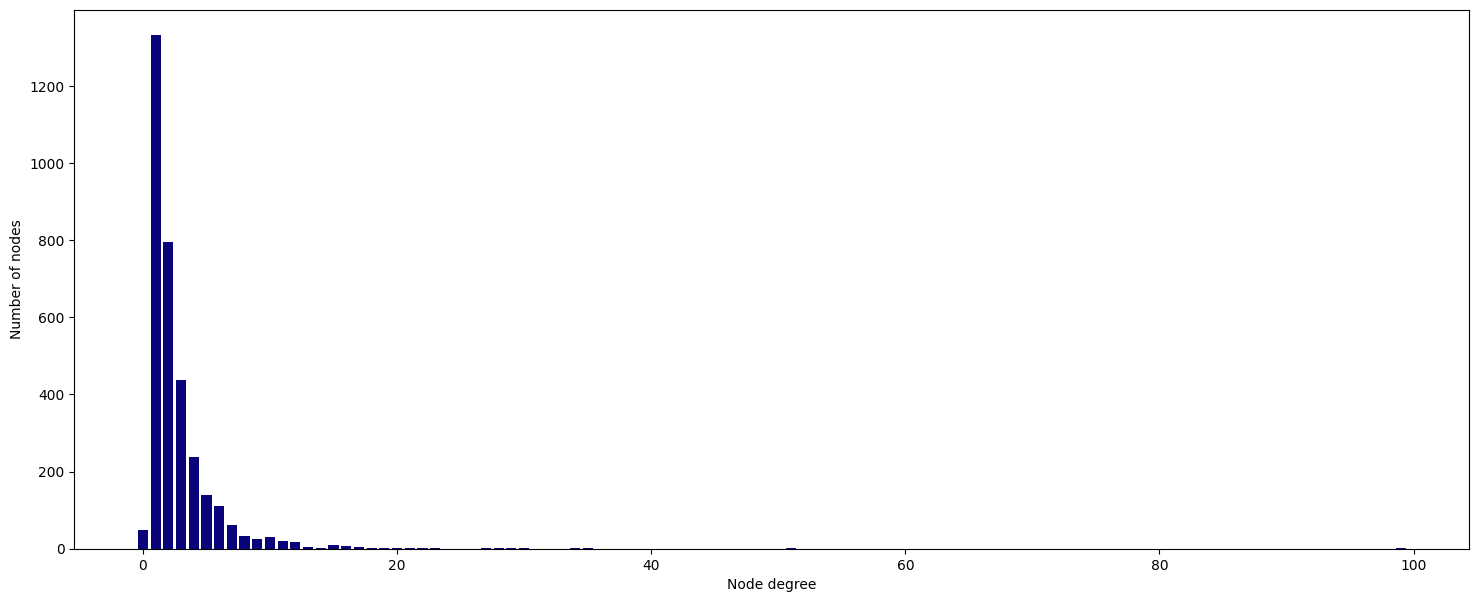

In [ ]:
degrees = degree(data.edge_index[0]).numpy()

# Count the number of nodes for each degree
numbers = Counter(degrees)

# Bar plot
fig, ax = plt.subplots(figsize=(18, 7))
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(numbers.keys(),
        numbers.values(),
        color='#0A047A')

In [110]:
sum(data.x[0] > 0)

tensor(31)

## TASK: Node Classification 


In [131]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, number_of_features,number_of_classes, hidden_layer_1 = 16, hidden_layer_2 = 4):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(number_of_features, hidden_layer_1)
        self.relu1 = nn.ReLU()
        self.conv2 = GCNConv(hidden_layer_1, number_of_classes)
    
    def forward(self, x, edge_index):
        h_prime = self.conv1(x)
        h = self.relu1(h_prime)
        h_final = self.conv2(h)

        output = torch.softmax(h_final, dim=0)

In [ ]:
m

In [132]:
model = GCN(data.num_features, dataset.num_classes)
model

GCN(
  (conv1): GCNConv(3703, 16)
  (relu1): ReLU()
  (conv2): GCNConv(16, 6)
)